In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
%pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/10.7 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/10.7 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/10.7 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/10.7 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/10.7 MB 818.9 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/10.7 MB 818.9 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/10.7 MB 749.2 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/10.7 MB 749.2 kB/s eta 0:00:13
   ------ --------------------------------- 1.8/10.7 MB 763.5 kB/s eta 0:00:12
   -------

In [3]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.metrics import confusion_matrix  , accuracy_score , \
precision_score , recall_score ,  f1_score  , classification_report  

In [6]:
path  =  r"C:\Users\admin\Downloads\diabetes.csv"

In [7]:
db = pd.read_csv(path)

# basic checks

In [8]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [10]:
db.shape

(2000, 9)

In [11]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
db.duplicated().sum()

np.int64(1256)

In [14]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
db.drop_duplicates(inplace  =  True)

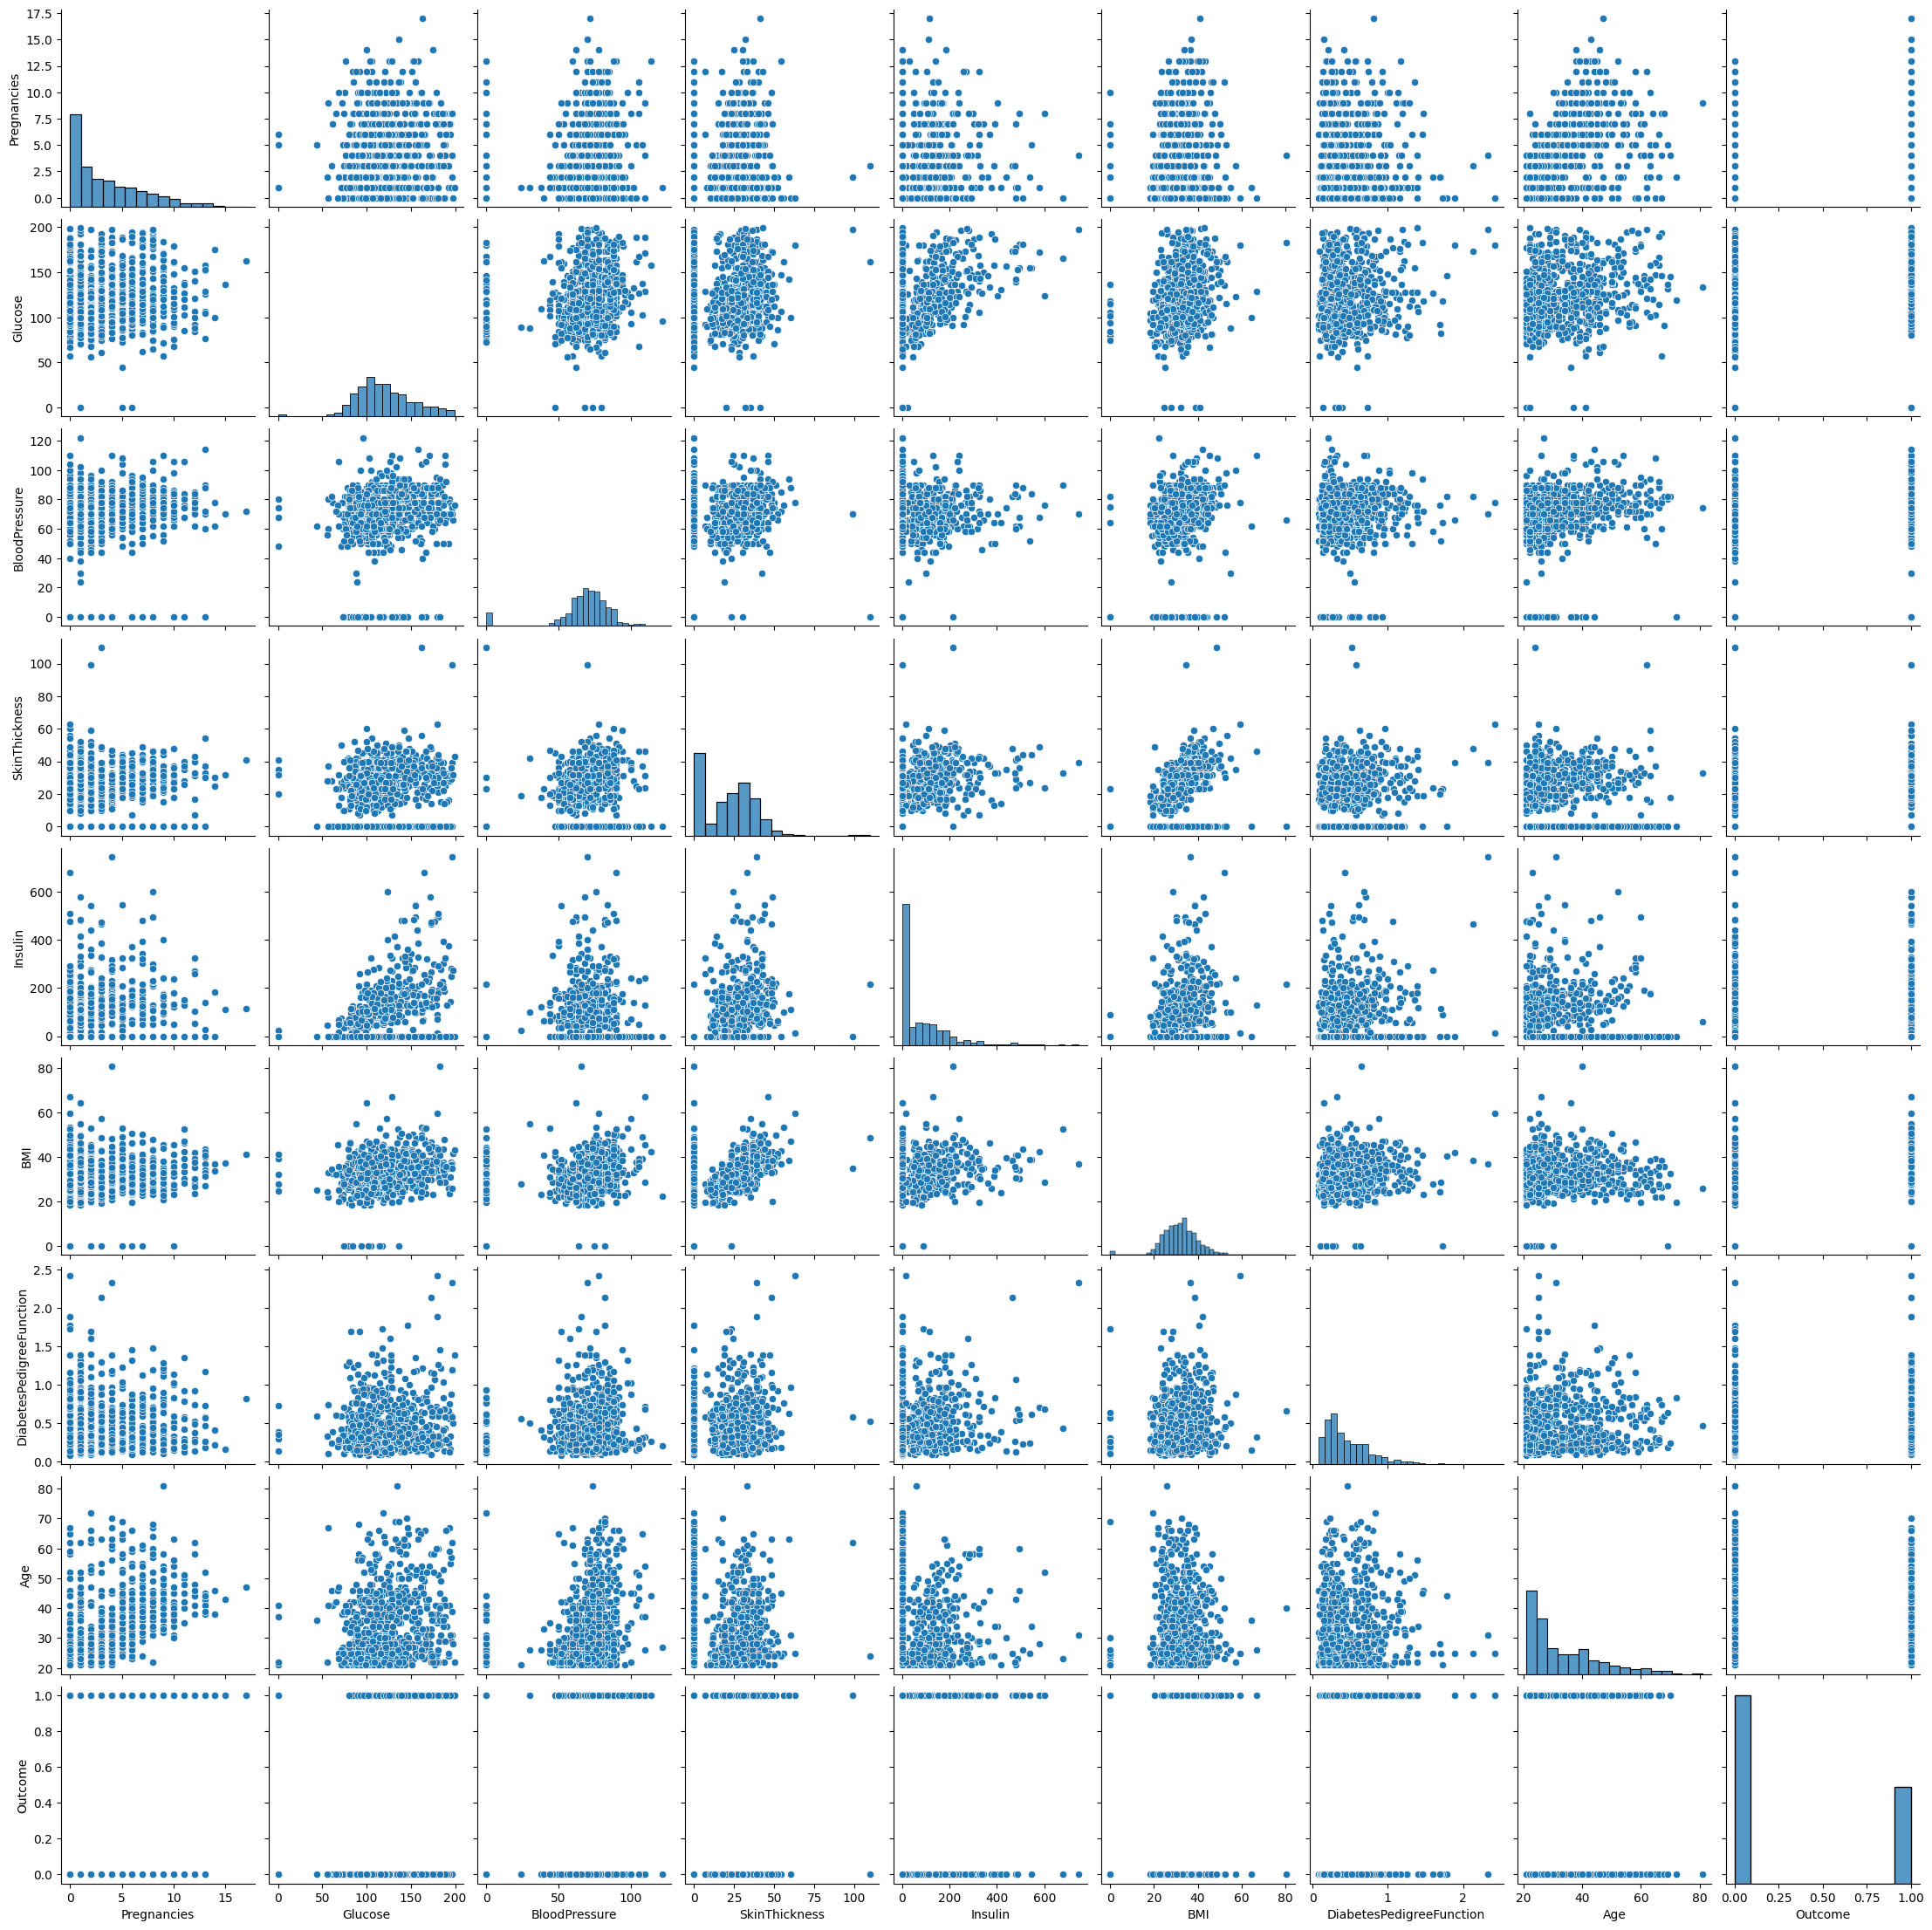

In [16]:
sns.pairplot(db  )

In [ ]:
#detect outliers

In [ ]:
# seperate dependent and independent column

In [18]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
x =  db.drop('Outcome'  , axis =  1)

In [20]:
y  =  db['Outcome']

In [22]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,744.0,3.752688,3.335541,0.000,1.000,3.0000,6.0000,17.00
Glucose,744.0,120.892473,31.943115,0.000,99.000,117.0000,140.2500,199.00
BloodPressure,744.0,68.959677,19.317521,0.000,62.000,72.0000,80.0000,122.00
SkinThickness,744.0,20.908602,16.311726,0.000,0.000,23.0000,32.0000,110.00
Insulin,744.0,79.534946,111.745897,0.000,0.000,36.0000,130.0000,744.00
BMI,744.0,32.229704,8.206319,0.000,27.400,32.3000,36.8000,80.60
DiabetesPedigreeFunction,744.0,0.472355,0.326181,0.078,0.244,0.3755,0.6325,2.42
Age,744.0,33.142473,11.751286,21.000,24.000,29.0000,40.2500,81.00


In [ ]:
col  =  list(x.columns)

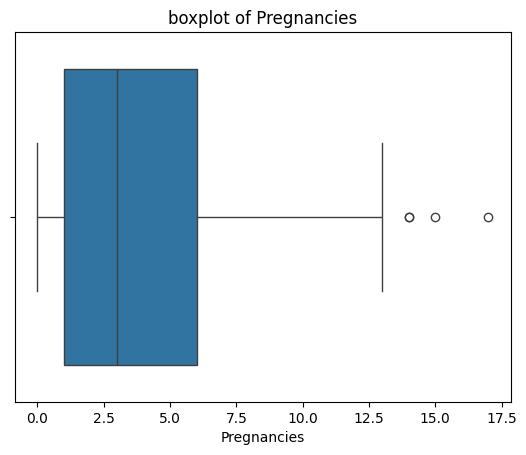

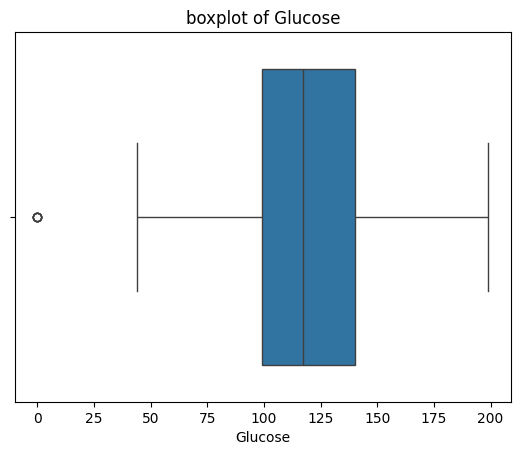

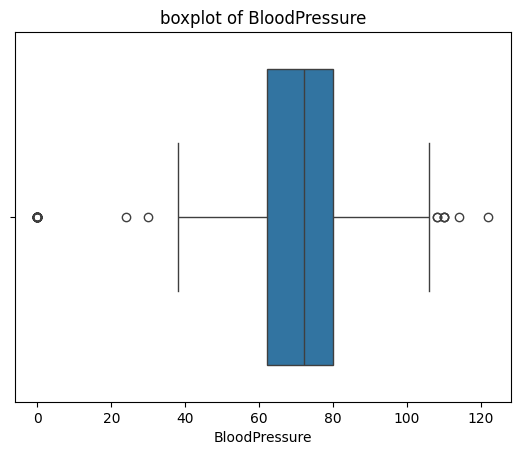

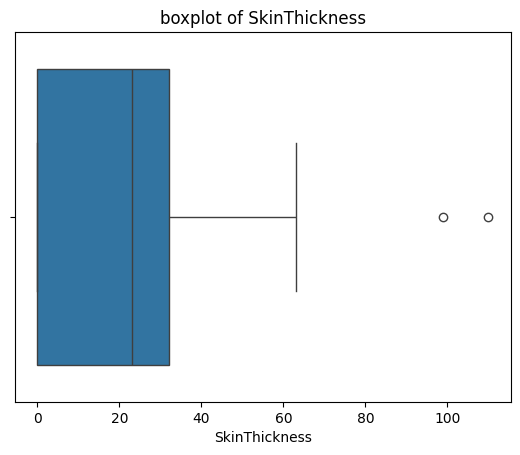

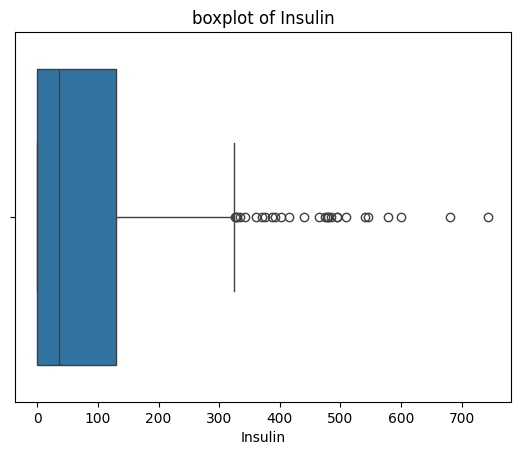

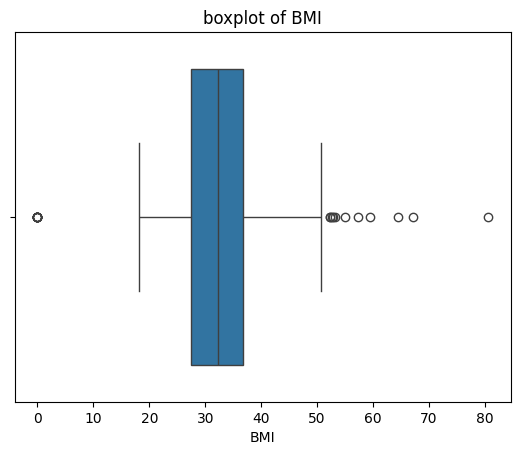

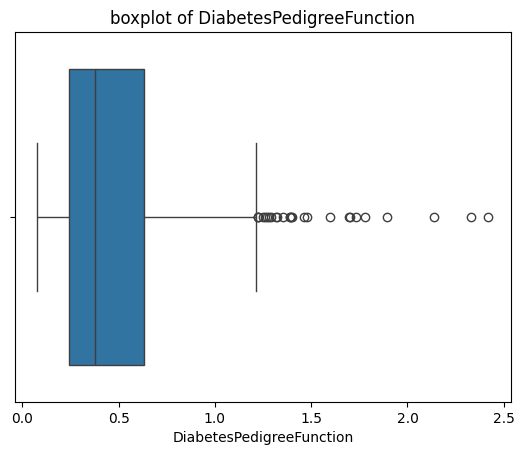

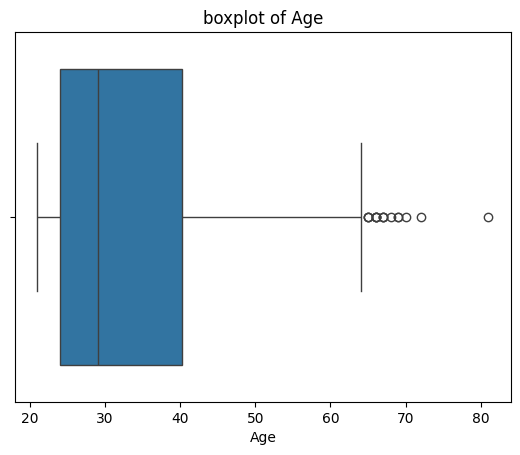

In [43]:
for i in col:
    sns.boxplot(data = db ,x  = i)
    plt.title(f'boxplot of {i}')
    plt.show()

In [44]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# diabetes pedigree function
# insulin

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

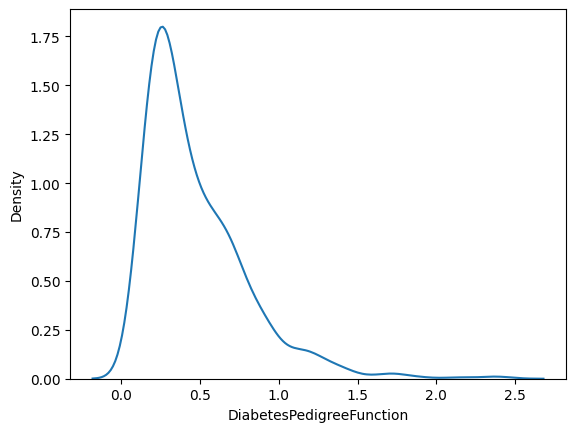

In [45]:
sns.kdeplot(data = db , x = 'DiabetesPedigreeFunction' )

<Axes: xlabel='Insulin', ylabel='Density'>

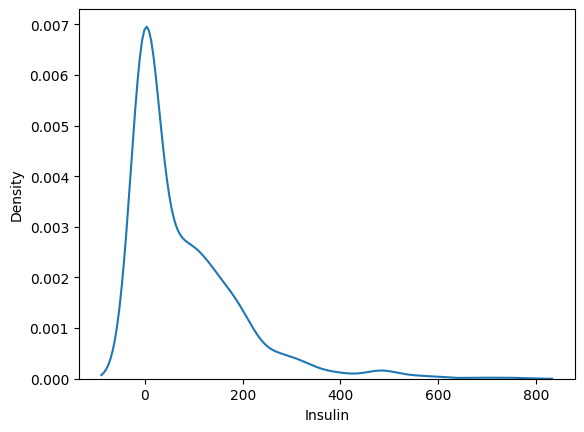

In [46]:
sns.kdeplot(data = db , x = 'Insulin' )

In [49]:
from scipy import stats

In [51]:
q1_diaped_fun = stats.quantile(db['DiabetesPedigreeFunction'] , 0.25)
q2_diaped_fun = stats.quantile(db['DiabetesPedigreeFunction'] , 0.50)
q3_diaped_fun = stats.quantile(db['DiabetesPedigreeFunction'] , 0.75)

In [53]:
# detection of outliers
# ll  =  q1- 1.5*(q3-q1)
#ul  =  q3+ 1.5*(q3-q1)
ll_dia_ped_fun  =  db[db['DiabetesPedigreeFunction']<(q1_diaped_fun-1.5*(q3_diaped_fun -q3_diaped_fun ))]

In [ ]:
ll_dia_ped_fun. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
10,4,99,68,38,0,32.8,0.145,33,0
12,3,80,0,0,0,0.0,0.174,22,0
16,7,195,70,33,145,25.1,0.163,55,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
758,1,106,76,0,0,37.5,0.197,26,0
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0


In [55]:
x.shape

(744, 8)

In [56]:
185/744

0.24865591397849462

In [52]:
q1_insulin = stats.quantile(db['Insulin'] , 0.25)
q2_insulin  = stats.quantile(db['Insulin'] , 0.50)
q3_insulin  = stats.quantile(db['Insulin'] , 0.75)

In [23]:
# standard scaling
st  =  StandardScaler()

In [57]:
x1 =  st.fit_transform(x)

In [58]:
x1

array([[-0.52581192,  0.53592255, -0.36052035, ...,  0.16709288,
        -1.05949657,  1.18002819],
       [-1.12581817, -1.15571984,  0.67550568, ...,  0.72801358,
        -0.73430455, -0.86367534],
       [-1.12581817,  0.75520952, -3.57220105, ...,  1.45964929,
         0.48363158, -0.18244083],
       ...,
       [ 0.67420056,  0.56724926,  0.77910829, ...,  2.25225464,
        -0.46740167,  1.43549114],
       [-0.52581192,  1.44439716, -1.29294378, ...,  2.49613321,
        -0.06244558, -0.43790377],
       [-0.2258088 ,  1.28776361, -3.57220105, ...,  2.00837607,
         0.14616817, -0.77852103]], shape=(744, 8))

In [59]:
x1  =  pd.DataFrame(x1 , columns  =  x.columns)

In [60]:
x1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.525812,0.535923,-0.360520,0.864463,-0.712227,0.167093,-1.059497,1.180028
1,-1.125818,-1.155720,0.675506,0.619075,0.407135,0.728014,-0.734305,-0.863675
2,-1.125818,0.755210,-3.572201,-1.282677,-0.712227,1.459649,0.483632,-0.182441
3,-1.125818,0.441942,-0.049713,1.293890,1.526497,1.227965,-0.329348,-0.778521
4,-0.825815,0.567249,-0.360520,1.232544,3.586122,1.032862,0.195254,-1.033984


In [61]:
# train_test _split
x_train , x_test , y_train , y_test  = train_test_split(x , y  , test_size  = 0.2 , random_state = 45)

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(595, 8)
(595,)
(149, 8)
(149,)


In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
KNN = KNeighborsClassifier(n_neighbors= 3 , metric= 'euclidean')

In [65]:
KNN.fit(x_train , y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [66]:
KNN.score(x_train , y_train)

0.8470588235294118

In [ ]:
%pip uninstall scikit-learn

In [67]:
# training Evaluation 
y_train_pred = KNN.predict(x_train)

In [68]:
print('recall' ,  recall_score(y_train , y_train_pred))
print('precision' ,  recall_score(y_train , y_train_pred))
print('f1_score' ,  f1_score(y_train , y_train_pred))
print('accuracy score ' ,  recall_score(y_train , y_train_pred))
print('classification report ' ,  classification_report(y_train , y_train_pred))



recall 0.6984924623115578
precision 0.6984924623115578
f1_score 0.7533875338753387
accuracy score  0.6984924623115578
classification report                precision    recall  f1-score   support

           0       0.86      0.92      0.89       396
           1       0.82      0.70      0.75       199

    accuracy                           0.85       595
   macro avg       0.84      0.81      0.82       595
weighted avg       0.85      0.85      0.84       595



In [70]:
# training Evaluation 
y_test_pred = KNN.predict(x_test)
print('recall' ,  recall_score(y_test , y_test_pred))
print('precision' ,  recall_score(y_test , y_test_pred))
print('f1_score' ,  f1_score(y_test , y_test_pred))
print('accuracy score ' ,  recall_score(y_test , y_test_pred))
print('classification report ' ,  classification_report(y_test , y_test_pred))



recall 0.5370370370370371
precision 0.5370370370370371
f1_score 0.5471698113207547
accuracy score  0.5370370370370371
classification report                precision    recall  f1-score   support

           0       0.74      0.76      0.75        95
           1       0.56      0.54      0.55        54

    accuracy                           0.68       149
   macro avg       0.65      0.65      0.65       149
weighted avg       0.68      0.68      0.68       149



In [ ]:
from sklearn.model_selection import GridSearchCVSearch
GridSearchCVSearch( )

In [74]:
param  = {'metric' : ['euclidean' , 'minkowski' , 'manhattan'] ,
         'n_neighbors' : range(3 , 7)}

In [77]:
gscv = GridSearchCV(KNN  , param_grid = param , cv  = 5 )

In [78]:
gscv.fit(x_train , y_train)

,estimator,KNeighborsCla...n_neighbors=3)
,param_grid,"{'metric': ['euclidean', 'minkowski', ...], 'n_neighbors': range(3, 7)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [80]:
gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [81]:
y_train_pred =  gscv.predict(x_train)

In [82]:
print('recall' ,  recall_score(y_train , y_train_pred))
print('precision' ,  recall_score(y_train , y_train_pred))
print('f1_score' ,  f1_score(y_train , y_train_pred))
print('accuracy score ' ,  recall_score(y_train , y_train_pred))
print('classification report ' ,  classification_report(y_train , y_train_pred))

recall 0.6381909547738693
precision 0.6381909547738693
f1_score 0.7016574585635359
accuracy score  0.6381909547738693
classification report                precision    recall  f1-score   support

           0       0.83      0.91      0.87       396
           1       0.78      0.64      0.70       199

    accuracy                           0.82       595
   macro avg       0.81      0.77      0.79       595
weighted avg       0.82      0.82      0.81       595



In [83]:
# testing evaluation

y_test_pred = gscv.predict(x_test)
print('recall' ,  recall_score(y_test , y_test_pred))
print('precision' ,  recall_score(y_test , y_test_pred))
print('f1_score' ,  f1_score(y_test , y_test_pred))
print('accuracy score ' ,  recall_score(y_test , y_test_pred))
print('classification report ' ,  classification_report(y_test , y_test_pred))



recall 0.5925925925925926
precision 0.5925925925925926
f1_score 0.6213592233009708
accuracy score  0.5925925925925926
classification report                precision    recall  f1-score   support

           0       0.78      0.82      0.80        95
           1       0.65      0.59      0.62        54

    accuracy                           0.74       149
   macro avg       0.72      0.71      0.71       149
weighted avg       0.73      0.74      0.74       149

